<a href="https://colab.research.google.com/github/igormartins0301/Analises_exploratorias_dados/blob/main/Tratamento_e_analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Atividade de Análise exploratória e Tratamento de Dados

In [ ]:
import pandas as pd
import seaborn as srn
import statistics  as sts

### Análise exploratória

In [ ]:
#Importar dados
df = pd.read_csv('/content/tempo.csv', sep = ';')

In [ ]:
#Visualizar dados
df.head(14)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [ ]:
#Tamanho 
df.shape

(14, 5)

In [ ]:
#Explorar dados categóricos
# Aparência
agrupado = df.groupby(['Aparencia']).size()
print(agrupado)

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64


* Primeiro erro encontrado: 'menos'

In [ ]:
#Vento
agrupado = df.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

* Inicialmente parece estar tudo ok com essa coluna.

In [ ]:
# Jogar
agrupado = df.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

* Tudo ok com a coluna 'Jogar'

In [ ]:
# Explorar colunas numéricas
df.describe()

,Temperatura,Umidade
count,14.000000,13.000000
mean,155.571429,89.769231
std,306.433759,34.540203
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,85.000000
75%,80.750000,90.000000
max,1220.000000,200.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Temperatura')

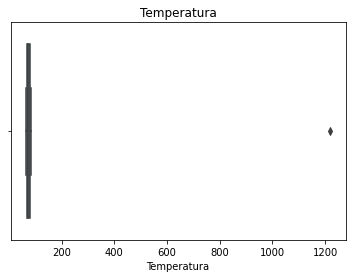

In [ ]:
# Gráfico Boxplot das variáveis numéricas.

srn.boxplot(df['Temperatura']).set_title('Temperatura')


* Podemos notar que há um Outlier na variável Temperatura, com valor de 1200.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Umidade')

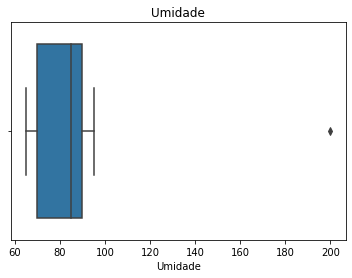

In [ ]:
srn.boxplot(df['Umidade']).set_title('Umidade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


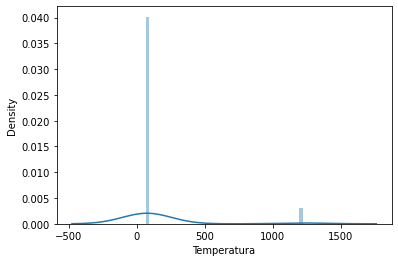

In [ ]:
srn.distplot(df['Temperatura'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


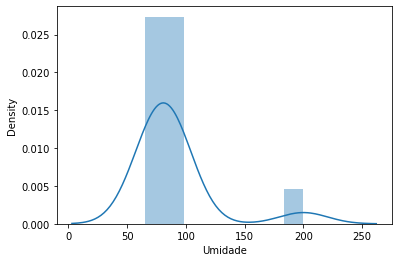

In [ ]:
srn.distplot(df['Umidade'])

### Tratamento de Dados





Itens que precisam passar por tratamento

* Coluna Aparência: substituir o valor 'menos' pela moda.
* Coluna Vento: remover valor vazio e substituir pela moda.
* Temperatura: Remover o valor outlier de '1200' e trocar por mediana
* Umidade: trocar valor vazio por mediana e valor acima de 100 pela mediana.


In [ ]:
#contamos valores NaN
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [ ]:
# Remover NaN  de 'Umidade' e substituir pela mediana 
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [ ]:
mediana = sts.median(df['Umidade'])
mediana

85.5

In [ ]:
#Substituir NaN por mediana
df['Umidade'].fillna(mediana, inplace = True)

In [ ]:
#Confirmando Tratamento
df['Umidade'].isnull().sum()

0

In [ ]:
# Remover NaN  de 'Vento' e substituir pela moda
df['Vento'].describe()

count        13
unique        2
top       FALSO
freq          7
Name: Vento, dtype: object

In [ ]:
#substituindo o valor Nan pela moda (FALSO)
df['Vento'].fillna('FALSO', inplace = True)

In [ ]:
#Confirmando tratamento
df.isnull().sum()

#Sem valores vazios no DF.

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [ ]:
df['Aparencia'].describe()

count      14
unique      4
top       sol
freq        5
Name: Aparencia, dtype: object

In [ ]:
#Substituir o valor 'menos' pela moda na coluna Aparencia
df.loc[df['Aparencia'] == 'menos','Aparencia'] = 'sol'

#ver resultado
agrupado = df.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [ ]:
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [ ]:
#Tratamento da coluna Temperatura, remover outlier e substituir por mediana
mediana = sts.median(df['Temperatura'])
mediana

73.5

In [ ]:
df.loc[df['Temperatura'] == 1220,'Temperatura'] = mediana
agrupado = df.groupby(['Temperatura']).size()
agrupado

Temperatura
64.0    1
65.0    1
68.0    1
69.0    1
70.0    1
71.0    1
72.0    1
73.5    1
75.0    2
80.0    1
81.0    1
83.0    1
85.0    1
dtype: int64

In [ ]:
#Tratar a coluna umidade, remover valor acima de 100 e trocar por mediana
mediana = sts.median(df['Umidade'])
mediana

85.25

In [ ]:
df.loc[df['Umidade'] == 200,['Umidade']] = mediana
agrupado = df.groupby(['Umidade']).size()
agrupado

Umidade
65.00    1
70.00    3
75.00    1
80.00    1
85.00    1
85.25    1
85.50    1
86.00    1
90.00    2
91.00    1
95.00    1
dtype: int64

### Resultado

In [ ]:
df.head(14)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.00,FALSO,nao
1,sol,80.0,90.00,VERDADEIRO,nao
2,nublado,83.0,86.00,FALSO,sim
3,chuva,70.0,85.50,FALSO,sim
4,chuva,68.0,80.00,FALSO,sim
5,chuva,65.0,70.00,VERDADEIRO,nao
6,sol,64.0,65.00,VERDADEIRO,sim
7,sol,73.5,95.00,FALSO,nao
8,sol,69.0,70.00,FALSO,sim
9,chuva,75.0,85.25,FALSO,sim
